## Reference
> - [Auto-Generated Knowledge Graphs](https://towardsdatascience.com/auto-generated-knowledge-graphs-92ca99a81121)
- [networkx.convert_matrix.from_pandas_edgelist](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#networkx-convert-matrix-from-pandas-edgelist)

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
nodes = pd.read_csv('/Users/Rebeca/Fintech_中信專案/try.csv', header=0)

In [3]:
nodes

,From,to,relation
0,50,1234,0.6
1,50,5678,0.8
2,50,4321,0.55
3,50,8765,0.78
4,50,1314,0.9
5,1234,1,price
6,1234,2,volume
7,1234,3,opening price
8,1234,4,highest price
9,1234,5,lowest price


In [77]:
nodes[nodes['From']==50]['to']

0    1234
1    5678
2    4321
3    8765
4    1314
Name: to, dtype: int64

In [4]:
node_dic = {}
for i in nodes['From']:
    node_dic[i]=[]
    for j in nodes[nodes['From']==i]['to']:
        node_dic[i].append(j)
print(node_dic)

{50: [1234, 5678, 4321, 8765, 1314], 1234: [1, 2, 3, 4, 5], 5678: [6, 7, 8, 9, 10], 4321: [11, 12, 13, 14, 15], 8765: [16, 17, 18, 19, 20], 1314: [21, 22, 23, 24, 25]}


In [255]:

node_dic[node_dic[50][1]][0]

6

In [5]:
##設定node位置
lay={}
lay[50]=[0,0]
lay[node_dic[50][0]]=[0,0.175] #1234
lay[node_dic[50][1]]=[0.0875,0.0875]
lay[node_dic[50][2]]=[0.0875,-0.0875]
lay[node_dic[50][3]]=[-0.0875,-0.0875]
lay[node_dic[50][4]]=[-0.0875,0.0875]

lay[node_dic[1234][0]]=[-0.04,0.25]
lay[node_dic[1234][1]]=[-0.025,0.275]
lay[node_dic[1234][2]]=[0,0.29]
lay[node_dic[1234][3]]=[0.025,0.275]
lay[node_dic[1234][4]]=[0.04,0.25]

lay[node_dic[5678][0]]=[0.125,0.165]
lay[node_dic[5678][1]]=[0.14,0.175]
lay[node_dic[5678][2]]=[0.165,0.165]
lay[node_dic[5678][3]]=[0.175,0.14]
lay[node_dic[5678][4]]=[0.165,0.125]

lay[node_dic[4321][0]]=[0.165,-0.125]
lay[node_dic[4321][1]]=[0.175,-0.14]
lay[node_dic[4321][2]]=[0.165,-0.165]
lay[node_dic[4321][3]]=[0.14,-0.175]
lay[node_dic[4321][4]]=[0.125,-0.165]

lay[node_dic[1314][0]]=[-0.125,0.165]
lay[node_dic[1314][1]]=[-0.14,0.175]
lay[node_dic[1314][2]]=[-0.165,0.165]
lay[node_dic[1314][3]]=[-0.175,0.14]
lay[node_dic[1314][4]]=[-0.165,0.125]


lay[node_dic[8765][0]]=[-0.165,-0.125]
lay[node_dic[8765][1]]=[-0.175,-0.14]
lay[node_dic[8765][2]]=[-0.165,-0.165]
lay[node_dic[8765][3]]=[-0.14,-0.175]
lay[node_dic[8765][4]]=[-0.125,-0.165]

In [28]:
def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'From', 'to',
            create_using=nx.MultiDiGraph())
    
    node_deg = nx.degree(k_graph)
    #layout = nx.spring_layout(k_graph) #nx.spring_layout(k_graph)#, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(5, 5))#, dpi=80)

    nx.draw_networkx(
        k_graph,
        node_size=300,#[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=2,
        linewidths=1,
        pos=lay,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        font_size=5
        )
    labels = dict(zip(list(zip(pairs.From, pairs.to)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=lay, edge_labels=labels,font_size=5,
                                 font_color='g')
    plt.axis('off')
    plt.show()

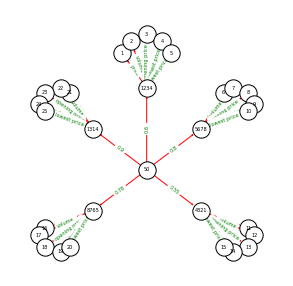

In [29]:
draw_kg(nodes)